## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, data about the convertion intention of several users when exposed to the older or the new version of an e-commerce website are available in the **ab_data.csv** dataset. Also information about the country of residence for those users is provided in the **countries.csv** dataset. These data can be used to examine statistical hypothesis tests regarding whether the new version of the website leads to larger convertion rates.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import some libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure we get same answers ecerytime we run the notebook
random.seed(42)

`1.` 

a. Let's read in the dataset and take a look at the top few rows:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Number of rows in the dataset.

In [3]:
rows = df.shape[0]
print(rows)

294478


c. The number of unique users in the dataset.

In [4]:
uniques_users = df.shape[0] - df.user_id.duplicated().sum()
print(uniques_users)

290584


d. The proportion of users converted.

In [5]:
conv_sum = df.converted[df.converted == 1].sum()
# print(conv_sum)
conv_proportion = conv_sum/uniques_users
print(conv_proportion)

0.12126269856564711


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
not_lining = df.loc[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
print(not_lining)


3893


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page. These rows should be removed.

a. Let's create a new dataframe called **df2** that meets these specifications.

In [8]:
drop_indices = df.loc[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index
df2 = df.drop(drop_indices)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** to answer some questions about the data quality

a. How many unique **user_id**s are in **df2**?

In [10]:
uniques_users2 = df2.shape[0] - df2.user_id.duplicated().sum()
print(uniques_users2)

290584


b. Find duplicates if any

In [11]:
print(df2[df2.user_id.duplicated()])

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [12]:
print(df2[df2.user_id.duplicated()].index)

Int64Index([2893], dtype='int64')


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(inplace=True)
print(df2.duplicated().sum()) # should be 0

0


`4.` Use **df2** in the below cells to answer questions about probabilities.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
conv_sum = df2.loc[df2.converted == 1].shape[0]
conv_p = conv_sum/df2.shape[0]
print(conv_p)

0.11959667567149027


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
conv_ctrl_sum = df2.loc[(df2.group == "control") & (df2.converted == 1)].shape[0] # binary operator necessary, 'and' won't work
ctrl_sum = df2.loc[(df2.group == "control")].shape[0]
conv_ctrl_p = conv_ctrl_sum/ctrl_sum
print(conv_ctrl_p)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
conv_treat_sum = df2.loc[(df2.group == "treatment") & (df2.converted == 1)].shape[0]
treat_sum = df2.loc[(df2.group == "treatment")].shape[0]
conv_treat_p = conv_treat_sum/treat_sum
print(conv_treat_p)

0.11880724790277405


d. What is the probability that an individual received the new page?

In [17]:
new_page_sum = df2.loc[(df2.landing_page == "new_page")].shape[0]
new_page_p = new_page_sum/df2.shape[0]
print(new_page_p)

0.5000636646764286


e. Is there sufficient evidence to say that the new treatment page leads to more conversions?

**The distribution of the new page versus the old one (placebo) was done equally (as intented) since there is a 0.5 probability that a person received the new page and 0.5 for the old. That means that the control and treatment groups are equally sized and there cannot be any sample size biases. On the other hand, we observe that both groups displayed a similar probability of converting. In fact the probability that someone from the treatment group converted is slightly smaller. Based on these results we cannot say that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

We could technically run a hypothesis test continuously as each observation was observed, because we have the timestamps.  

This would require further research and answer to questions like whether to stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  What amount of time is required to render a decision that neither page is better than another?  
 


`1.` For now, let's consider we need to make the decision just based on all the data provided.  Let's assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%.

**In this case we perform a 1-tailed test in the $p_{new} - p_{old}$ distribution. The null hypothesis in this case should be that the older page has more or equal convertion rates unless proven otherwise, that means $p_{new} \leq p_{old}$ or $p_{new} - p_{old} \leq 0$ , unless there are evidence for the alternative hypothesis that the new page has higher rates. In this case, in order to reject the null hypothesis we should observe a p-value < 0.05**

`2.` Let's assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, let's assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

We'll use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

We'll perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2.converted.mean()
print(p_new)

0.11959667567149027


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = p_new # by assumption
print(p_old)

0.11959667567149027


c. What is $n_{new}$?

In [20]:
n_new = df2.loc[(df2.group == "treatment")].shape[0]
print(n_new)

145311


d. What is $n_{old}$?

In [21]:
n_old = df2.loc[(df2.group == "control")].shape[0]
print(n_old)

145274


e. Let's simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.

In [22]:
new_page_converted = np.random.choice(2, n_new, p=[1-p_new, p_new])

f. Let's simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.

In [23]:
old_page_converted = np.random.choice(2, n_old, p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for the simulated values from part (e) and (f). This is expected to be approximately 0.

In [24]:
p_new2 = new_page_converted[new_page_converted == 1].shape[0]/new_page_converted.shape[0] 
p_old2 = old_page_converted[old_page_converted == 1].shape[0]/old_page_converted.shape[0]
print(p_new2 - p_old2)

0.002915201930095715


h. Let's simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one calculated in parts **a. through g.** above and store all 10,000 values in a numpy array called **p_diffs**. Instead of looping that might take some time, it is more preferable to use vectorized numpy operations.

In [25]:
# p_diffs = np.zeros(10000)
# for i, diff in enumerate(p_diffs):
    
#     new_page_converted = np.random.choice(2, n_new, p=[1-p_new, p_new])
#     old_page_converted = np.random.choice(2, n_old, p=[1-p_old, p_old])
#     p_new2 = new_page_converted[new_page_converted == 1].shape[0]/new_page_converted.shape[0]
#     p_old2 = old_page_converted[old_page_converted == 1].shape[0]/old_page_converted.shape[0]
#     p_diffs[i] = p_new2 - p_old2
    
# print(p_diffs)

# simulate n_new biased coin flips (0 or 1 with prob of p_new) 10000 times and divide by n_new to scale from 0 to 1
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new 
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted
print(p_diffs)

[-4.36402282e-04 -9.24844767e-05  4.03064102e-04 ... -1.40939207e-04
  7.20003347e-04  5.81740039e-04]


i. Let's plot a histogram of the **p_diffs**. We expect a normal distribution around 0.

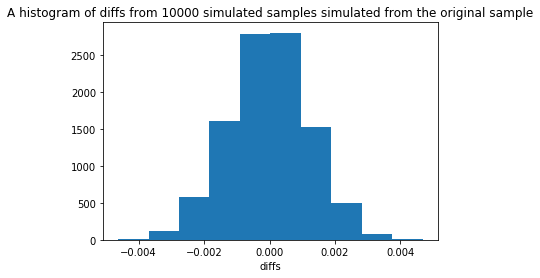

In [26]:
plt.hist(p_diffs);
plt.xlabel("diffs");
plt.title("A histogram of diffs from 10000 simulated samples simulated from the original sample");

**It is as we expect since we observe a normal distribution around 0**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**? In other words what is the p-value of our bootstraping?

Observed difference: -0.0016
Proportion of differences larger than the observed (p-value): 0.9016


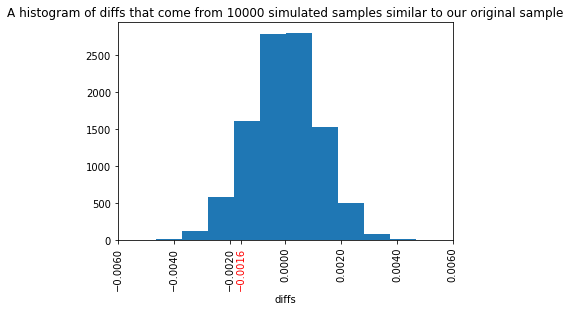

In [27]:
obs_diff = round((conv_treat_p - conv_ctrl_p), 4)
print("Observed difference: {}".format(obs_diff))
larger_prop = p_diffs[p_diffs > obs_diff].shape[0]/p_diffs.shape[0]
print("Proportion of differences larger than the observed (p-value): {}".format(larger_prop)) # this is the p-value

plt.hist(p_diffs);
plt.xlabel("diffs");
plt.title("A histogram of diffs that come from 10000 simulated samples similar to our original sample");
plt.xticks(list(plt.xticks()[0]) + [obs_diff], rotation=90);
plt.gca().get_xticklabels()[-1].set_color("red");

k. What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We just computed the probability of oberving our statistic (or one more extreme in favor of the alternative), if the null hypothesis is true. This probability is called the p-value. Since our statistic is $p_{new} - p_{old}$ and our null hypothesis is that it is not significantly larger than 0, we have concluded that there is a very large possibility that we observe a more extreme statistic than the one in our sample. This possibility is the area on the right of the observed difference marked with red in our histogram. This means that we do not have enough evidence to reject the null hypothesis that the old page causes more convertion rates and we should stick with it.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

In [28]:
import statsmodels.api as sm

convert_old = sum((df2.group == 'control') & (df2.converted == 1))
convert_new = sum((df2.group == 'treatment') & (df2.converted == 1))
n_old = df2.loc[(df2.group == "control")].shape[0]
n_new = df2.loc[(df2.group == "treatment")].shape[0]

m. Now let's use `stats.proportions_ztest` to compute our test statistic and p-value.

In [29]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print("z = {}\n p = {}".format(stat, pval))

z = -1.3116075339133115
 p = 0.905173705140591


n. Do the results agree with the findings in parts **j.** and **k.**?

**The z-value is approximately -1.31 and the p-value is approximately 0.9. Based on on the way we passed our parameters and set the alternative parameter, here is what the z-test documentation states: ` In the two sample test, smaller means that the alternative hypothesis is p1 < p2 and larger means p1 > p2 where p1 is the proportion of the first sample and p2 of the second one.` Since we select larger, in our case this means that the null hypothesis is that $p_{new} \leq p_{old}$ or $p_{new} - p_{old} \leq 0$, which is the z-statistic returned by the method. The method indeed returns a negative z-statistic of -1.31 with a high p-value of 0.9. This means that we do not have enough evidence to accept the alternative hypothesis, on the contrast we have strong evidence to stick with the null that the old page is related with higher convertion rates.**

<a id='regression'></a>
### Part III - A regression approach

`1.` The result we acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should we be performing?

**A logistic regression is best suited in this case of binary variables.**

b. The goal is to use **statsmodels** to fit the regression model specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, we first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Let's add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
df2.insert(df2.shape[1], "intercept", 1, True) # add as last column
dummies = df2.group.replace(["treatment", "control"], [1,0]) # replace the keywords with 1 and 0
df2.insert(df2.shape[1], 'ab_page', dummies, True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Let's use **statsmodels** to import our regression model, instantiate the model, and fit the model using the two columns created in part **b.** to predict whether or not an individual converts. <a href="http://blog.yhat.com/posts/logistic-regression-and-python.html">here</a> is a good resource for the Logit regression.

In [31]:
import statsmodels.api as sm

train_cols = df2.columns[df2.shape[1]-2:] # last 2 columns
print(train_cols)
model = sm.Logit(df2['converted'], df2[train_cols])
results = model.fit()

Index(['intercept', 'ab_page'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Let's provide the summary of the model below

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 May 2020   Pseudo R-squ.:               8.085e-06
Time:                        16:00:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value we found in **Part II**?<br><br>  

**In this case the p-value is 0.190. So far the null  hypothesis was that the old page receives tha same convertion rates as the new page. In this case, the null hypothesis is that the selected page is linearly dependent to the convertion rates and the alternative that it is not. Based on the p-value of 0.190 we do not have enough evidence to support the alternative that the page shown isn't related with the convertion rate, and we should stick with the null.**

f. Now, let's consider other things that might influence whether or not an individual converts. Let's discuss why it is a good idea to consider other factors to add into our regression model.  Are there any disadvantages to adding additional terms into our regression model?

**We can see that our model fits well because of the low standard errors in the coefficients. There could be other factors that might cause a user to convert, like age, country etc. so by adding extra variables we are likely to improve our model's score. On the other hand there are some factors that could create problems in our model and they typically should be examined before adding a variable:**
1. **Linear relationship between the extra variable and the predicted variable might not actually exist**
2. **Outliers that would have to be handled before inserting the variable**
3. **Co-linearity with the extra variable and other predictor variables in our model**

g. Now along with testing if the conversion rate changes for different pages, let's also add an effect based on which country a user lives. We will need to read in the **countries.csv** dataset and merge together the datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

- **Note: We will need two columns for the three dummy variables. The one value deleted can be implied and is used as the baseline category, if not done so problems in fitting can arise** 

In [33]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner') # we need the same key in order to join the datasets
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [34]:
df_country_dum = pd.get_dummies(df_new.country, prefix='country') # Create the necessary dummy variables
df_country_dum.drop('country_US', axis=1, inplace=True) # drop 1 dummy so that it does not affect the model (baseline category)
df_final = df_new.join(df_country_dum, how='inner') # join with the previous df, they already have same index
df_final.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,country_CA,country_UK
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0


In [35]:
train_cols_country = df_final.columns[df_final.shape[1]-4:]
print(train_cols_country)
model_country = sm.Logit(df_final['converted'], df_final[train_cols_country])
results_country = model_country.fit()
results_country.summary()

Index(['intercept', 'ab_page', 'country_CA', 'country_UK'], dtype='object')
Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290587
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 May 2020   Pseudo R-squ.:               2.326e-05
Time:                        16:00:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1756
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0150      0.011     -1.309      0.191      -0.037       0.007
country_CA    -0.0407      0.027     -1.515      0.130      -0.093       0.012
country_UK     0.0099      0.013      0.745      0.457      -0.016       0.036
==============================================================================
"""

**It seems that the variables fit well since the show low-residuals. Also the fact that they display statistically significant p-values supports that they have a linear relationship with the predicted variable. In fact "country_UK" seems to be more closely related.**

h. Let's now look at an interaction between page and country to see if there significant effects on conversion.  Let's create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [36]:
### Fit Your Linear Model And Obtain the Results
df_final["page_CA"] = df_final["ab_page"]*df_final['country_CA']
df_final["page_UK"] = df_final["ab_page"]*df_final['country_UK']
df_final.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,country_CA,country_UK,page_CA,page_UK
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,0,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,0,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,0,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,0,0


In [37]:
train_cols_inter = df_final.columns[df_final.shape[1]-6:]
print(train_cols_inter)
model_inter = sm.Logit(df_final['converted'], df_final[train_cols_inter])
results_inter = model_inter.fit()
results_inter.summary()

Index(['intercept', 'ab_page', 'country_CA', 'country_UK', 'page_CA',
       'page_UK'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.366106
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290587
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            5
Date:                Wed, 27 May 2020   Pseudo R-squ.:               3.485e-05
Time:                        16:00:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1915
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.508      0.132      -0.047       0.006
country_CA    -0.0175      0.038     -0.465      0.642      -0.091       0.056
country_UK    -0.0057      0.019     -0.306      0.760      -0.043       0.031
page_CA       -0.0469      0.054     -0.871      0.384      -0.152       0.059
page_UK        0.0314      0.027      1.182      0.237      -0.021       0.084
==============================================================================
"""

**Again the extra variables seem to fit well. "country_UK", still remains the best fitted variable**

<a id='conclusions'></a>
## Conclusions

In this project we performed an A/B test on data for an old and new version of an e-commercial website. Specifically we:
* **Used a bootstrap simulation to perform a hypothesis test and proved that there is not enough evidence to claim that the new version is related with higher conversion rates**
* **Proved the  same by utilizing the built in z-test available in the statsmodels library**
* **Demonstrated how a regression classifier can be developed for binary output variables using the logistic regression**
